In [37]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx

In [38]:
def find_min_set_max_cut(G,num_repeat,sampler):
    if sampler=='SimulatedAnnealing':
        import neal
        sampler=neal.SimulatedAnnealingSampler()
    else:
        from dwave.system.samplers import DWaveSampler
        from dwave.system.composites import EmbeddingComposite
        sampler=EmbeddingComposite(DWaveSampler())
    from collections import defaultdict
    min_set=defaultdict(list)
    for i in range(num_repeat):
        response=dnx.maximum_cut(G,sampler)
        min_set[len(response)].append(list(response))
    return min(list(min_set.keys()))

In [39]:
def find_min_set_exactsolver(G):
    import dimod
    sampler=dimod.ExactSolver()
    response=dnx.maximum_cut(G,sampler)
    return len(response)

##  Florentine_families_graph

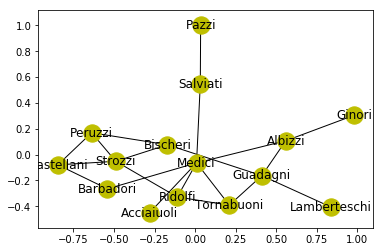

In [40]:
G=nx.social.florentine_families_graph()
nx.draw_networkx(G,with_labels=True,node_color='y')
plt.show()

In [41]:
#print('Quantum Annealing= '+str(find_min_set_max_cut(G,100,'QuantumAnnealing')))
print('Simulated Annealing : '+str(find_min_set_max_cut(G,100,'SimulatedAnnealing')))
print('Exact Solver : '+str(find_min_set_exactsolver(G)))

Simulated Annealing : 6
Exact Solver : 6


## davis_southern_women_graph

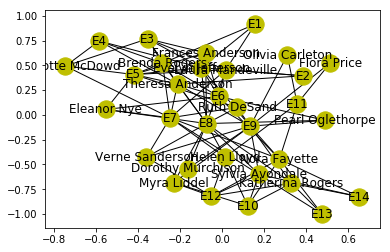

In [31]:
G=nx.social.davis_southern_women_graph()
nx.draw_networkx(G,with_labels=True,node_color='y')
plt.show()

In [33]:
print('Simulated Annealing : '+str(find_min_set_max_cut(G,100,'SimulatedAnnealing')))
#print('Exact Solver : '+str(find_min_set_exactsolver(G)))

Simulated Annealing : 14


## Karate Club Graph

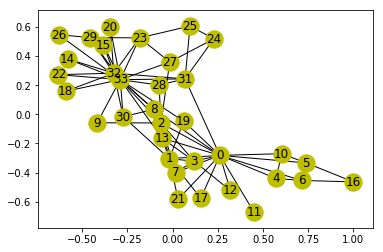

In [34]:
G=nx.social.karate_club_graph()
nx.draw_networkx(G,with_labels=True,node_color='y')
plt.show()

In [36]:
print('Simulated Annealing : '+str(find_min_set_max_cut(G,100,'SimulatedAnnealing')))
#print('Exact Solver : '+str(find_min_set_exactsolver(G)))

Simulated Annealing : 9
